In [16]:
from src.utils.env_export import create_json
from src.utils.khalili_env import get_env
from src.policy.jas_voc_policy import JAS_voc_policy
from src.utils.mouselab_jas import MouselabJas
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt
import json
from src.utils.data_classes import Action
from src.policy.po_uct import POUCT, POUCT_policy
from simulation import run_episode


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
env, cfg = get_env()

In [18]:
pouct = POUCT_policy(steps=5000, rollout_depth=0, exploration_coeff=10)
mgps = JAS_voc_policy(cost_weight=0.5798921379230035)

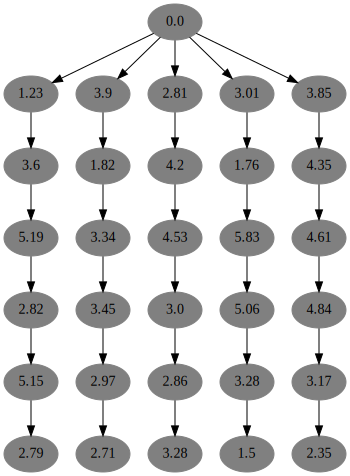

In [19]:
env.reset(seed=100)
env._render(revealed=True)

In [28]:
res, actions, obs_list = run_episode(env, mgps, 0, return_obs=True)
for action, obs in zip(actions, obs_list):
    print(f"(P, C, E)={env.action_to_readable(action)} -> {obs}")
print(f"Term reward={np.round(res.reward, 4)}")


(P, C, E)=(0, 4, 1) -> 5.0
(P, C, E)=(0, 4, 5) -> 5.0
Term reward=3.8236


In [31]:
res, actions, obs_list = run_episode(env, pouct, 0, return_obs=True)
for action, obs in zip(actions, obs_list):
    print(f"(P, C, E)={env.action_to_readable(action)} -> {obs}")
print(f"Term reward={np.round(res.reward, 4)}")

(P, C, E)=(3, 4, 4) -> 5.0
(P, C, E)=(3, 3, 1) -> 5.0
(P, C, E)=(3, 2, 3) -> 1.0
(P, C, E)=(0, 4, 4) -> 5.0
(P, C, E)=(0, 5, 1) -> 1.0
Term reward=3.6576


In [41]:
res, actions, obs_list = run_episode(env, mgps, 10, return_obs=True)
for action, obs in zip(actions, obs_list):
    print(f"(P, C, E)={env.action_to_readable(action)} -> {obs}")
print(f"Term reward={np.round(res.reward, 4)}")

(P, C, E)=(4, 4, 1) -> 4.0
(P, C, E)=(1, 4, 1) -> 5.0
(P, C, E)=(1, 4, 5) -> 5.0
Term reward=3.8216


In [42]:
res, actions, obs_list = run_episode(env, pouct, 10, return_obs=True)
for action, obs in zip(actions, obs_list):
    print(f"(P, C, E)={env.action_to_readable(action)} -> {obs}")
print(f"Term reward={np.round(res.reward, 4)}")

(P, C, E)=(1, 4, 5) -> 5.0
(P, C, E)=(1, 5, 5) -> 3.0
(P, C, E)=(1, 3, 4) -> 1.0
(P, C, E)=(2, 4, 1) -> 1.0
(P, C, E)=(1, 3, 0) -> 2.0
Term reward=3.6388


In [45]:
pouct_big = POUCT_policy(steps=10000, rollout_depth=0, exploration_coeff=10)
res, actions, obs_list = run_episode(env, pouct_big, 10, return_obs=True)
for action, obs in zip(actions, obs_list):
    print(f"(P, C, E)={env.action_to_readable(action)} -> {obs}")
print(f"Term reward={np.round(res.reward, 4)}")

(P, C, E)=(3, 4, 5) -> 3.0
(P, C, E)=(4, 4, 5) -> 2.0
(P, C, E)=(2, 4, 2) -> 1.0
(P, C, E)=(0, 4, 5) -> 5.0
(P, C, E)=(0, 5, 1) -> 1.0
Term reward=3.6694
